HW 1:

Question: Which node functions result in the best results for a given amount of computation time?

In [65]:
using CSV, DataFrames, Random, Plots, Dates

Select a non-trivial two-class classification data set obtained from the internet, with 10-100 input attributes and at least a thousand data points, with at least 300 data points from each class.

In [2]:
data = CSV.read("water_potability.csv", DataFrame)

3276×10 DataFrame
  Row │ ph             Hardness  Solids   Chloramines  Sulfate      Conductivi ⋯
      │ Float64?       Float64   Float64  Float64      Float64?     Float64    ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ missing        204.89    20791.3      7.30021      368.516       564.3 ⋯
    2 │       3.71608  129.423   18630.1      6.63525  missing           592.8
    3 │       8.09912  224.236   19909.5      9.27588  missing           418.6
    4 │       8.31677  214.373   22018.4      8.05933      356.886       363.2
    5 │       9.09222  181.102   17979.0      6.5466       310.136       398.4 ⋯
    6 │       5.58409  188.313   28748.7      7.54487      326.678       280.4
    7 │      10.2239   248.072   28749.7      7.51341      393.663       283.6
    8 │       8.63585  203.362   13672.1      4.56301      303.31        474.6
  ⋮   │       ⋮           ⋮         ⋮          ⋮            ⋮            ⋮     ⋱
 3270 │      11.491     94.8125  37188.8      9.26317      258.931       439.8 ⋯
 3271 │       6.06962  186.659   26138.8      7.74755      345.7         415.8
 3272 │       4.6681   193.682   47581.0      7.16664      359.949       526.4
 3273 │       7.80886  193.553   17329.8      8.06136  missing           392.4
 3274 │       9.41951  175.763   33155.6      7.35023  missing           432.0 ⋯
 3275 │       5.12676  230.604   11983.9      6.30336  missing           402.8
 3276 │       7.87467  195.102   17404.2      7.50931  missing           327.4
                                                 5 columns and 3261 rows omitted

In [3]:
describe(data, :nmissing)

10×2 DataFrame
 Row │ variable         nmissing
     │ Symbol           Int64
─────┼───────────────────────────
   1 │ ph                    491
   2 │ Hardness                0
   3 │ Solids                  0
   4 │ Chloramines             0
   5 │ Sulfate               781
   6 │ Conductivity            0
   7 │ Organic_carbon          0
   8 │ Trihalomethanes       162
   9 │ Turbidity               0
  10 │ Potability              0

In [4]:
dropmissing!(data)

2011×10 DataFrame
  Row │ ph        Hardness  Solids   Chloramines  Sulfate  Conductivity  Organ ⋯
      │ Float64   Float64   Float64  Float64      Float64  Float64       Float ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │  8.31677  214.373   22018.4      8.05933  356.886       363.267        ⋯
    2 │  9.09222  181.102   17979.0      6.5466   310.136       398.411
    3 │  5.58409  188.313   28748.7      7.54487  326.678       280.468
    4 │ 10.2239   248.072   28749.7      7.51341  393.663       283.652
    5 │  8.63585  203.362   13672.1      4.56301  303.31        474.608        ⋯
    6 │ 11.1803   227.231   25484.5      9.0772   404.042       563.885
    7 │  7.36064  165.521   32452.6      7.5507   326.624       425.383
    8 │  7.11982  156.705   18730.8      3.60604  282.344       347.715
  ⋮   │    ⋮         ⋮         ⋮          ⋮          ⋮          ⋮              ⋱
 2005 │  5.8931   239.269   20526.7      6.34956  341.256       403.618        ⋯
 2006 │  8.19735  203.105   27701.8      6.47291  328.887       444.613
 2007 │  8.9899   215.047   15921.4      6.29731  312.931       390.41
 2008 │  6.70255  207.321   17246.9      7.70812  304.51        329.266
 2009 │ 11.491     94.8125  37188.8      9.26317  258.931       439.894        ⋯
 2010 │  6.06962  186.659   26138.8      7.74755  345.7         415.887
 2011 │  4.6681   193.682   47581.0      7.16664  359.949       526.424
                                                 4 columns and 1996 rows omitted

Normalize the output variable’s range to be in {0,1}.

In [5]:
function min_max_scale!(df::DataFrame)
    for col in names(df)
        min_val = minimum(df[!, col])
        max_val = maximum(df[!, col])
        df[!, col] = (df[!, col] .- min_val) / (max_val - min_val)
    end
    return df
end

min_max_scale!(data)
data.Potability = convert(Vector{Int8}, data.Potability)

2011-element Vector{Int8}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

The test set should contain (size of smaller class)/3 data points from each class.  

In [6]:
class_0 = filter(row -> row.Potability == 0, data)
class_1 = filter(row -> row.Potability == 1, data)
test_size = Int(floor(size(class_1)[1] / 3))
testIndices1 = randperm(size(class_1, 1))[1:test_size]
testData = class_1[testIndices1, :] 
deleteat!(class_1, sort(testIndices1))
testIndices2 = randperm(size(class_0, 1))[1:test_size]
append!(testData, class_0[testIndices2, :])
deleteat!(class_0, sort(testIndices2))
trainData = vcat(class_0, class_1)
append!(trainData, class_1[randperm(size(class_1, 1))[1:size(class_0, 1) - size(class_1, 1)], :])

1860×10 DataFrame
  Row │ ph        Hardness  Solids    Chloramines  Sulfate   Conductivity  Org ⋯
      │ Float64   Float64   Float64   Float64      Float64   Float64       Flo ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 0.587349  0.577747  0.386298     0.568199  0.647347      0.292985      ⋯
    2 │ 0.388934  0.470876  0.506122     0.524364  0.561537      0.142913
    3 │ 0.72582   0.715942  0.506141     0.521683  0.751819      0.148683
    4 │ 0.610517  0.532588  0.237701     0.270288  0.495155      0.494792
    5 │ 0.795265  0.630477  0.448008     0.654929  0.7813        0.656608      ⋯
    6 │ 0.517926  0.377405  0.572066     0.52486   0.561384      0.405573
    7 │ 0.500441  0.341251  0.327766     0.188748  0.435599      0.264798
    8 │ 0.444347  0.464394  0.725404     0.701997  0.668941      0.571163
  ⋮   │    ⋮         ⋮         ⋮           ⋮          ⋮           ⋮            ⋱
 1854 │ 0.536215  0.623347  0.258013     0.561661  0.646791      0.252763      ⋯
 1855 │ 0.362998  0.219915  0.135067     0.457652  0.586488      0.496105
 1856 │ 0.647599  0.62581   0.115129     0.668951  0.539799      0.467534
 1857 │ 0.459739  0.373776  0.540155     0.635763  0.407704      0.601686
 1858 │ 0.56157   0.618524  0.199942     0.690279  0.677401      0.453468      ⋯
 1859 │ 0.694649  0.231206  0.362518     0.681653  0.462971      0.408727
 1860 │ 0.421191  0.624094  0.210523     0.403489  0.673128      0.546456
                                                 4 columns and 1845 rows omitted

In [7]:
#Sanity Check - If classes are balanced in train and test data
@assert size(testData[testData.Potability .== Int8(0), :], 1) == size(testData[testData.Potability .== Int8(1), :], 1)
@assert size(trainData[trainData.Potability .== Int8(0), :], 1) == size(trainData[trainData.Potability .== Int8(1), :], 1)

In [8]:
trainX, trainY = trainData[!, [:ph, :Hardness, :Solids, :Chloramines, :Sulfate, :Conductivity, :Organic_carbon, :Trihalomethanes, :Turbidity]], trainData[!, :Potability]
testX, testY = testData[!, [:ph, :Hardness, :Solids, :Chloramines, :Sulfate, :Conductivity, :Organic_carbon, :Trihalomethanes, :Turbidity]], testData[!, :Potability]
trainX, trainY, testX, testY = Matrix{Float64}(trainX), Vector{Int8}(trainY), Matrix{Float64}(testX), Vector{Int8}(testY)

([0.5873491578253435 0.5777467079096754 … 0.7950293417620221 0.6301147622237924; 0.388933542845937 0.4708756416110572 … 0.4014871741458616 0.21997295112729956; … ; 0.6946494092864949 0.2312063763025927 … 0.6076298862084356 0.2964307776900983; 0.42119073043021116 0.6240935110362519 … 0.5616174614785947 0.33541492418136615], Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0.7114702546369241 0.08447578822469845 … 0.525865490910273 0.45318977649708214; 0.4295167196687205 0.3033872700267419 … 0.39525495220527396 0.7771256321028664; … ; 0.42566829570930553 0.5874365895735775 … 0.1939720321517155 0.2960547380334992; 0.5056788889603997 0.6353099027543923 … 0.3653635439302743 0.5258377124946358], Int8[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Implement a two-hidden-layer h-h-h-1 NN model, with each of the two hidden layers containing as many hidden nodes as the number of inputs, with (all) tanh node functions, and with a learning algorithm based on some variant of gradient descent or back-propagation.

In [9]:
using Flux

model = Chain(
    Dense(9 => 9, tanh),
    Dense(9 => 9, tanh), 
    Dense(9 => 1, tanh)
)
loss(x, y) = Flux.Losses.logitbinarycrossentropy(model(x), y) 
optimizer = ADAM()

function getConfusionMatrix(model, data)
    tPos, tNeg, fPos, fNeg = 0, 0, 0, 0
    for i in 1:size(data, 1)
        if model(data[i][1])[1] >= 0.5 && data[i][2][1] == 1
            tPos += 1
        elseif model(data[i][1])[1] >= 0.5 && data[i][2][1] == 0
            tNeg += 1
        elseif model(data[i][1])[1] < 0.5 && data[i][2][1] == 1
            fPos += 1
        else
            fNeg += 1
        end
    end
    return [tPos tNeg ; fPos fNeg]
end


getConfusionMatrix (generic function with 1 method)

Conduct one run of the experiment using the training data set, terminating when accuracy (on training data) no longer improves in 10 successive epochs. Let the final accuracy obtained be a.  Record the computational effort needed, in terms of the total number of weight updates.

In [92]:
function terminating_condition(epochs, accuracies)
    if epochs <= 500
        return true
    elseif epochs > 1e4
        return false
    else
        last10 = accuracies[end-9:end]
        diff = [last10[i + 1] - last10[i] for i in 1:length(last10) - 1]
        return !all(x -> x <= 0, diff)
    end
end

trainData = []
for i in range(start=1, stop=size(trainX, 1), step=1)
    push!(trainData, (trainX[i, :], [trainY[i]]))
end
testData = []
for i in range(start=1, stop=size(testX, 1), step=1)
    push!(testData, (testX[i, :], [testY[i]]))
end

trainData, testData = shuffle(trainData), shuffle(testData)
accuracies = []
epochs = 0
best_accuracy, best_model = 0, nothing
num_wt_updates = 0
wt_updates = []
while terminating_condition(epochs, accuracies)
    Flux.train!(loss, Flux.params(model), trainData, optimizer)
    num_wt_updates += sum(length, Flux.params(model))
    confusionMatrix = getConfusionMatrix(model, vcat(trainData, testData))
    accuracy = (confusionMatrix[1, 1] + confusionMatrix[2, 2]) / (sum(confusionMatrix))
    if accuracy > best_accuracy
        best_accuracy = accuracy
        best_model = model
    end
    push!(accuracies, accuracy)
    push!(wt_updates, log(num_wt_updates))
    if epochs % 1000 == 0
        println("Epoch $epochs - \nAccuracy: $accuracy\nNumber of weight updates: $num_wt_updates")
    end
    epochs += 1
end

Epoch 0 - 
Accuracy: 0.78625
Number of weight updates: 190


Epoch 1000 - 
Accuracy: 0.77625
Number of weight updates: 190190


Epoch 2000 - 
Accuracy: 0.7908333333333334
Number of weight updates: 380190


Epoch 3000 - 
Accuracy: 0.78125
Number of weight updates: 570190


Epoch 4000 - 
Accuracy: 0.7666666666666667
Number of weight updates: 760190


Epoch 5000 - 
Accuracy: 0.785
Number of weight updates: 950190


Epoch 6000 - 
Accuracy: 0.7833333333333333
Number of weight updates: 1140190


Epoch 7000 - 
Accuracy: 0.78
Number of weight updates: 1330190


Epoch 8000 - 
Accuracy: 0.7745833333333333
Number of weight updates: 1520190


Epoch 9000 - 
Accuracy: 0.7670833333333333
Number of weight updates: 1710190


Epoch 10000 - 
Accuracy: 0.7791666666666667
Number of weight updates: 1900190


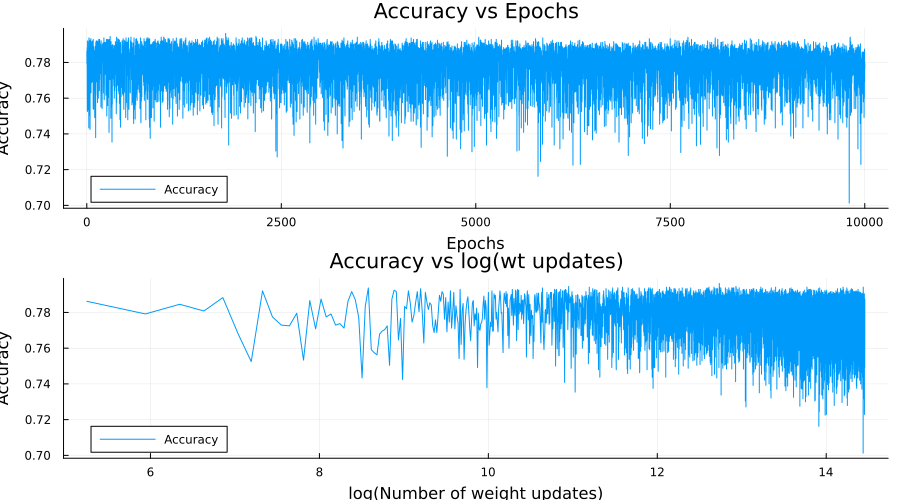

In [93]:
plot1_ae = plot(1:length(accuracies), accuracies, label="Accuracy", xlabel="Epochs", ylabel="Accuracy", title="Accuracy vs Epochs", size=(900, 500))
plot2_aw = plot(wt_updates, accuracies, label="Accuracy", xlabel="log(Number of weight updates)", ylabel="Accuracy", title="Accuracy vs log(wt updates)", size=(900, 500))
plot(plot1_ae, plot2_aw, layout = @layout [a;b])

In [94]:
final_confusionMatrix = getConfusionMatrix(best_model, vcat(trainData, testData))
final_accuracy = round(100*(final_confusionMatrix[1, 1] + final_confusionMatrix[2, 2]) / (sum(final_confusionMatrix)), digits = 2)
println("Confusion Matrix: $final_confusionMatrix\nAccuracy: $final_accuracy")

Confusion Matrix: [875 205; 325 995]
Accuracy: 77.92


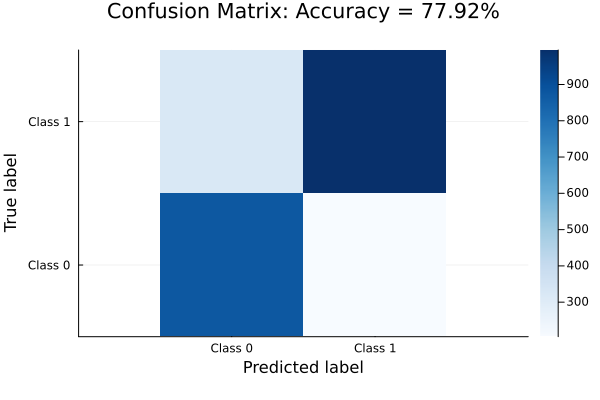

In [95]:
heatmap(final_confusionMatrix, 
        c=:Blues,
        color=:auto,
        aspect_ratio=:equal,
        xlabel="Predicted label",
        ylabel="True label",
        xticks=(1:size(final_confusionMatrix, 2), ["Class 0", "Class 1"]),
        yticks=(1:size(final_confusionMatrix, 1), ["Class 0", "Class 1"]),
        title="Confusion Matrix: Accuracy = $final_accuracy%")

Continue to use a tanh function for the output node.  But for all the other node functions, experiment with each of the following:
1.	ReLU
2.	Leaky ReLU
3.	MaxOut (node output is the maximum of its weighted inputs)
4.	GELU 

For each of the networks (with different node functions), run each network for the same amount of time, while also recording the number of weight updates performed in that time.

In [96]:
function timed_training(activation, total_time)
    model = Chain(
        Dense(9 => 9, activation),
        Dense(9 => 9, activation), 
        Dense(9 => 1, tanh)
    )
    loss(x, y) = Flux.Losses.logitbinarycrossentropy(model(x), y) 
    optimizer = ADAM()
    accuracies = []
    epochs = 0
    best_accuracy, best_model = 0, nothing
    num_wt_updates = 0
    wt_updates = []
    start = time()
    while (time() - start) < total_time
        Flux.train!(loss, Flux.params(model), trainData, optimizer)
        num_wt_updates += sum(length, Flux.params(model))
        confusionMatrix = getConfusionMatrix(model, vcat(trainData, testData))
        accuracy = (confusionMatrix[1, 1] + confusionMatrix[2, 2]) / (sum(confusionMatrix))
        if accuracy > best_accuracy
            best_accuracy = accuracy
            best_model = model
        end
        push!(accuracies, accuracy)
        push!(wt_updates, log(num_wt_updates))
        epochs += 1
    end
    return best_accuracy, best_model, accuracies, wt_updates
end

timed_training (generic function with 1 method)

In [97]:
function gelu2(x)
    return (0.5 * (1.0 + tanh(sqrt(2.0 / π) * (x + 0.044715 * x^3))))^2
end
activations = [relu, leakyrelu, maximum, gelu2]

4-element Vector{Function}:
 relu (generic function with 2 methods)
 leakyrelu (generic function with 3 methods)
 maximum (generic function with 14 methods)
 gelu2 (generic function with 1 method)

RELU

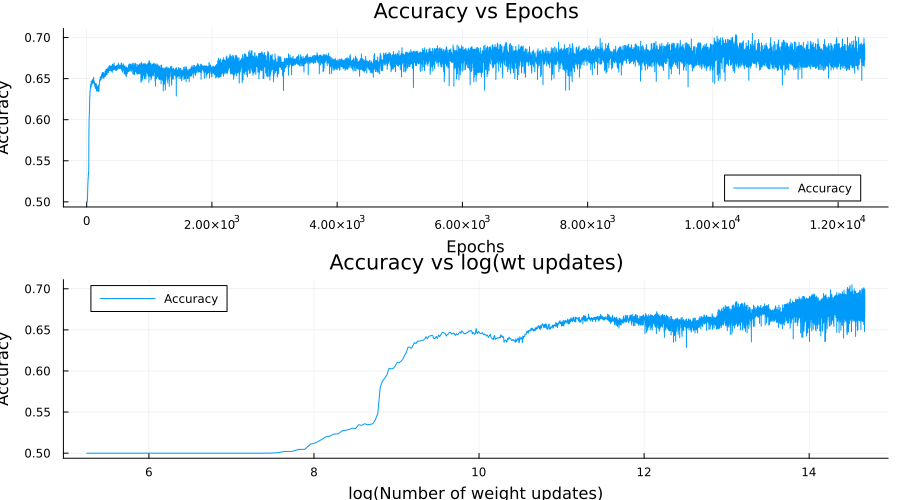

In [100]:
best_accuracy_relu, best_model_relu, accuracies_relu, wt_updates_relu = timed_training(relu, 500)
plot1_relu = plot(1:length(accuracies_relu), accuracies_relu, label="Accuracy", xlabel="Epochs", ylabel="Accuracy", title="Accuracy vs Epochs", size=(900, 500))
plot2_relu = plot(wt_updates_relu, accuracies_relu, label="Accuracy", xlabel="log(Number of weight updates)", ylabel="Accuracy", title="Accuracy vs log(wt updates)", size=(900, 500))
plot(plot1_relu, plot2_relu, layout = @layout [a;b])

Confusion Matrix: [640 222; 560 978]
Accuracy: 67.42


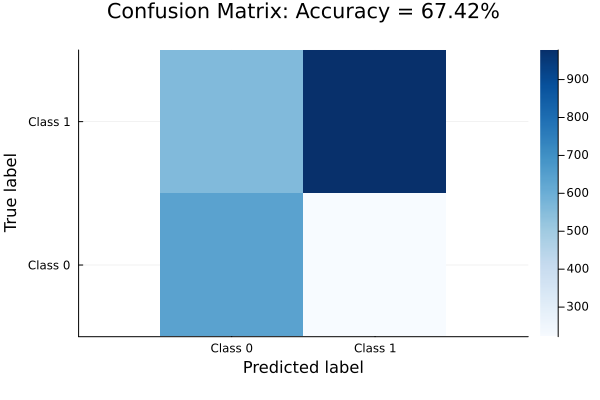

In [101]:
final_confusionMatrix_relu = getConfusionMatrix(best_model_relu, vcat(trainData, testData))
final_accuracy_relu = round(100*(final_confusionMatrix_relu[1, 1] + final_confusionMatrix_relu[2, 2]) / (sum(final_confusionMatrix_relu)), digits = 2)
println("Confusion Matrix: $final_confusionMatrix_relu\nAccuracy: $final_accuracy_relu")
heatmap(final_confusionMatrix_relu, 
        c=:Blues,
        color=:auto,
        aspect_ratio=:equal,
        xlabel="Predicted label",
        ylabel="True label",
        xticks=(1:size(final_confusionMatrix_relu, 2), ["Class 0", "Class 1"]),
        yticks=(1:size(final_confusionMatrix_relu, 1), ["Class 0", "Class 1"]),
        title="Confusion Matrix: Accuracy = $final_accuracy_relu%")

Leaky RELU

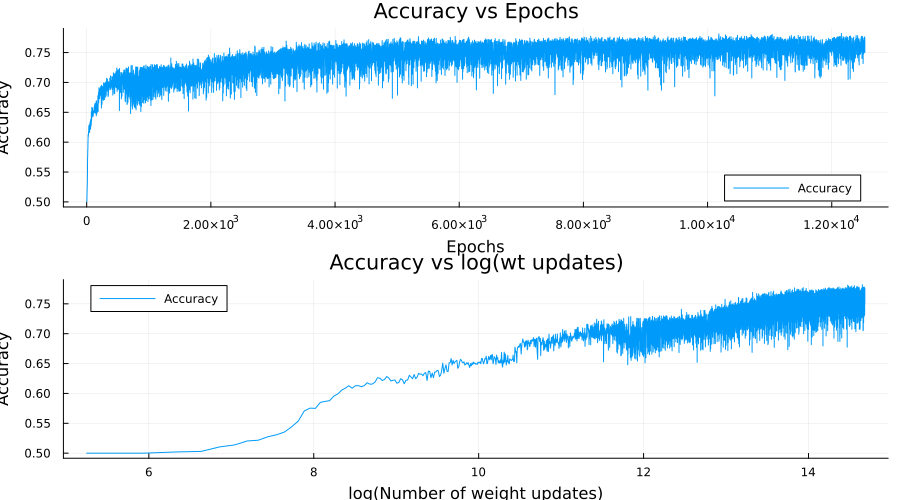

In [106]:
best_accuracy_lrelu, best_model_lrelu, accuracies_lrelu, wt_updates_lrelu = timed_training(leakyrelu, 500)
plot1_lrelu = plot(1:length(accuracies_lrelu), accuracies_lrelu, label="Accuracy", xlabel="Epochs", ylabel="Accuracy", title="Accuracy vs Epochs", size=(900, 500))
plot2_lrelu = plot(wt_updates_lrelu, accuracies_lrelu, label="Accuracy", xlabel="log(Number of weight updates)", ylabel="Accuracy", title="Accuracy vs log(wt updates)", size=(900, 500))
plot(plot1_lrelu, plot2_lrelu, layout = @layout [a;b])

Confusion Matrix: [841 240; 359 960]
Accuracy: 75.04


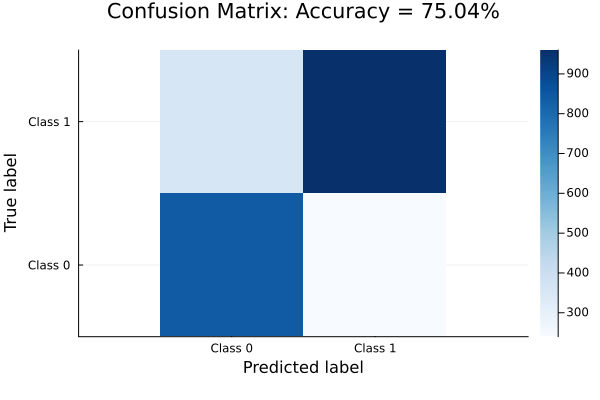

In [107]:
final_confusionMatrix_lrelu = getConfusionMatrix(best_model_lrelu, vcat(trainData, testData))
final_accuracy_lrelu = round(100*(final_confusionMatrix_lrelu[1, 1] + final_confusionMatrix_lrelu[2, 2]) / (sum(final_confusionMatrix_lrelu)), digits = 2)
println("Confusion Matrix: $final_confusionMatrix_lrelu\nAccuracy: $final_accuracy_lrelu")
heatmap(final_confusionMatrix_lrelu, 
        c=:Blues,
        color=:auto,
        aspect_ratio=:equal,
        xlabel="Predicted label",
        ylabel="True label",
        xticks=(1:size(final_confusionMatrix_lrelu, 2), ["Class 0", "Class 1"]),
        yticks=(1:size(final_confusionMatrix_lrelu, 1), ["Class 0", "Class 1"]),
        title="Confusion Matrix: Accuracy = $final_accuracy_lrelu%")

MaxOut

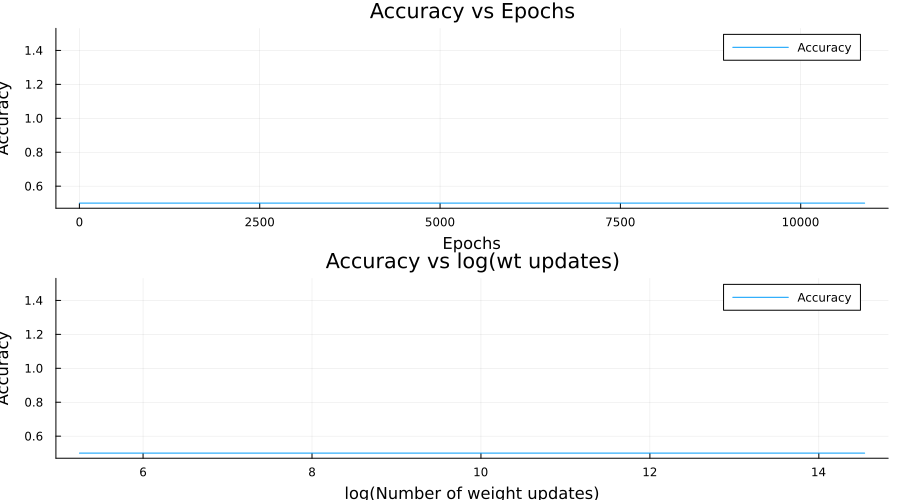

In [108]:
best_accuracy_maxout, best_model_maxout, accuracies_maxout, wt_updates_maxout = timed_training(maximum, 500)
plot1_maxout = plot(1:length(accuracies_maxout), accuracies_maxout, label="Accuracy", xlabel="Epochs", ylabel="Accuracy", title="Accuracy vs Epochs", size=(900, 500))
plot2_maxout = plot(wt_updates_maxout, accuracies_maxout, label="Accuracy", xlabel="log(Number of weight updates)", ylabel="Accuracy", title="Accuracy vs log(wt updates)", size=(900, 500))
plot(plot1_maxout, plot2_maxout, layout = @layout [a;b])

Confusion Matrix: [0 0; 1200 1200]
Accuracy: 50.0


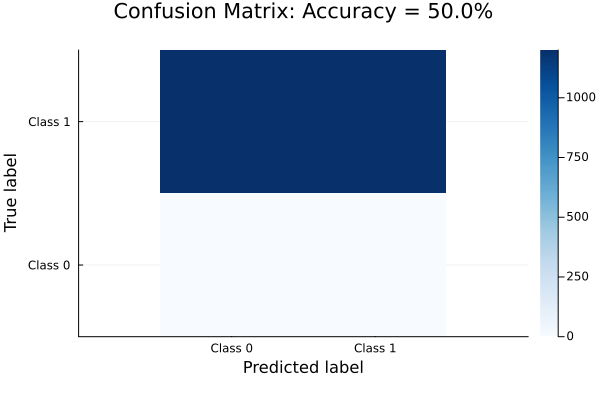

In [109]:
final_confusionMatrix_maxout = getConfusionMatrix(best_model_maxout, vcat(trainData, testData))
final_accuracy_maxout = round(100*(final_confusionMatrix_maxout[1, 1] + final_confusionMatrix_maxout[2, 2]) / (sum(final_confusionMatrix_maxout)), digits = 2)
println("Confusion Matrix: $final_confusionMatrix_maxout\nAccuracy: $final_accuracy_maxout")
heatmap(final_confusionMatrix_maxout, 
        c=:Blues,
        color=:auto,
        aspect_ratio=:equal,
        xlabel="Predicted label",
        ylabel="True label",
        xticks=(1:size(final_confusionMatrix_maxout, 2), ["Class 0", "Class 1"]),
        yticks=(1:size(final_confusionMatrix_maxout, 1), ["Class 0", "Class 1"]),
        title="Confusion Matrix: Accuracy = $final_accuracy_maxout%")

GELU

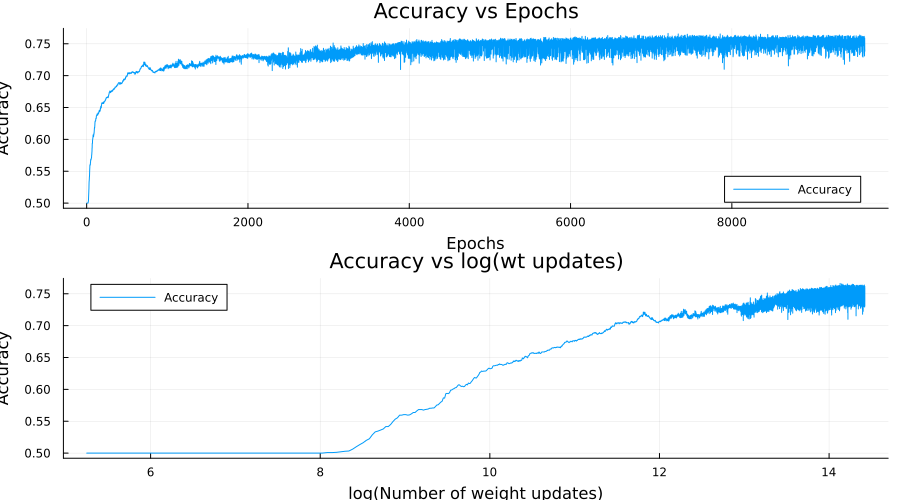

In [110]:
best_accuracy_gelu, best_model_gelu, accuracies_gelu, wt_updates_gelu = timed_training(gelu2, 500)
plot1_gelu = plot(1:length(accuracies_gelu), accuracies_gelu, label="Accuracy", xlabel="Epochs", ylabel="Accuracy", title="Accuracy vs Epochs", size=(900, 500))
plot2_gelu = plot(wt_updates_gelu, accuracies_gelu, label="Accuracy", xlabel="log(Number of weight updates)", ylabel="Accuracy", title="Accuracy vs log(wt updates)", size=(900, 500))
plot(plot1_gelu, plot2_gelu, layout = @layout [a;b])

Confusion Matrix: [826 254; 374 946]
Accuracy: 73.83


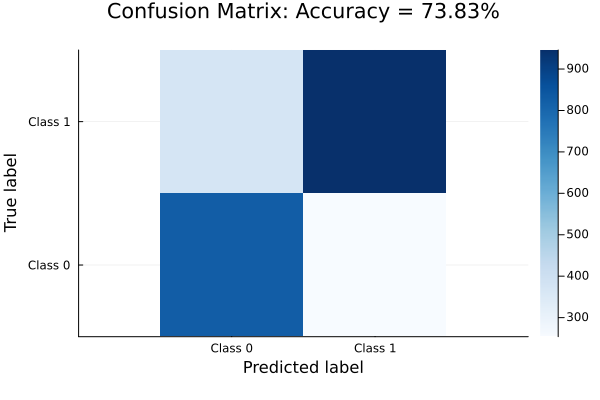

In [111]:
final_confusionMatrix_gelu = getConfusionMatrix(best_model_gelu, vcat(trainData, testData))
final_accuracy_gelu = round(100*(final_confusionMatrix_gelu[1, 1] + final_confusionMatrix_gelu[2, 2]) / (sum(final_confusionMatrix_gelu)), digits = 2)
println("Confusion Matrix: $final_confusionMatrix_gelu\nAccuracy: $final_accuracy_gelu")
heatmap(final_confusionMatrix_gelu, 
        c=:Blues,
        color=:auto,
        aspect_ratio=:equal,
        xlabel="Predicted label",
        ylabel="True label",
        xticks=(1:size(final_confusionMatrix_gelu, 2), ["Class 0", "Class 1"]),
        yticks=(1:size(final_confusionMatrix_gelu, 1), ["Class 0", "Class 1"]),
        title="Confusion Matrix: Accuracy = $final_accuracy_gelu%")